# Assignment 1: Sentiment Analysis Classifier

##### Group 26: Michal Dawid Kowalski (up202401554) | Pedro Maria Passos Ribeiro do Carmo Pereira (up) | Santiago Romero Pineda (up)

In this assignment, we will build a sentiment analysis classifier using traditional machine learning techniques. The process includes pre-processing, feature extraction, and exploring both sparse and dense feature representations like word embeddings. We will use "traditional" machine learning classifier instead of deep learning models (CNNs, RNNs, Transformers). The focus will be on understanding text classification techniques and evaluating their performance on the given dataset using common classification metrics like accuracy, precision, recall, and F1-score.



In [4]:
# Import libraries
from our_eda import *
from our_modeling import *
from our_preprocessing import *
from our_feature_extraction import *
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np
import pandas as pd

[nltk_data] Downloading package stopwords to /Users/me/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/me/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/me/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/me/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /Users/me/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


# 1. BESSTIE Dataset

## 1.1 Uploading Dataset Files from HuggingFace (https://huggingface.co/mindhunter23)

The dataset is hosted on Hugging Face under the username "mindhunter23." It consists of text data collected from Reddit and Google for the countries UK, AU, and IN. All texts are in English and are labeled with sentiment values: 0 for negative sentiment and 1 for positive sentiment. The dataset is already split into training and validation sets, making it ready for sentiment analysis tasks. It offers diverse content from different regions and platforms.

### - BESSTIE-reddit-sentiment-uk/

In [21]:
splits = {'train': 'reddit-sentiment-uk-train.jsonl', 'validation': 'reddit-sentiment-uk-valid.jsonl'}
df_reddit_sentiment_uk = pd.read_json("hf://datasets/mindhunter23/BESSTIE-reddit-sentiment-uk/" + splits["train"], lines=True)
df_reddit_sentiment_uk_val = pd.read_json("hf://datasets/mindhunter23/BESSTIE-reddit-sentiment-uk/" + splits["validation"], lines=True)
df_reddit_sentiment_uk.head(5)

,id,text,sentiment_label
0,1cimjpr,"So instead of making savings, they continued t...",0
1,1d35qlg,Needless story to have dragged into the electi...,0
2,1d3i3mt,"Now, in an ideal world there would be insight ...",0
3,1d5a8wa,How did you not get mind controlled at birth t...,0
4,1d5l3e9,"Talk lately of conscription, having a store of...",0


In [47]:
print('Training CLasses Distribution\n')
print(class_distribution(df_reddit_sentiment_uk))
print('Validation CLasses Distribution\n')
print(class_distribution(df_reddit_sentiment_uk_val))

Training CLasses Distribution

                 Count  Percentage
sentiment_label                   
0                  892       88.58
1                  115       11.42
None
Validation CLasses Distribution

                 Count  Percentage
sentiment_label                   
0                  122       88.41
1                   16       11.59
None


### - BESSTIE-reddit-sentiment-au/

In [19]:
splits = {'train': 'reddit-sentiment-au-train.jsonl', 'validation': 'reddit-sentiment-au-valid.jsonl'}
df_reddit_sentiment_au = pd.read_json("hf://datasets/mindhunter23/BESSTIE-reddit-sentiment-au/" + splits["train"], lines=True)
df_reddit_sentiment_au_val = pd.read_json("hf://datasets/mindhunter23/BESSTIE-reddit-sentiment-au/" + splits["validation"], lines=True)
df_reddit_sentiment_au.head(5)

,id,text,sentiment_label
0,1d2d56d,"No its more about risk management, why accept ...",1
1,1d2cfsd,I don’t play this game. \n\nThem: “What are yo...,0
2,1cw9vcr,Well I'm not really confident that we'll see m...,0
3,1czvemb,He's not wrong though alot of media is RW sla...,0
4,1d3x6bo,Please contact safe transport Victoria. This i...,1


In [45]:
print('Training CLasses Distribution\n')
print(class_distribution(df_reddit_sentiment_au))
print('Validation CLasses Distribution\n')
print(class_distribution(df_reddit_sentiment_au_val))

Training CLasses Distribution

                 Count  Percentage
sentiment_label                   
0                 1200       68.07
1                  563       31.93
None
Validation CLasses Distribution

                 Count  Percentage
sentiment_label                   
0                  164       68.05
1                   77       31.95
None


### - BESSTIE-google-sentiment-uk

In [23]:
splits = {'train': 'google-sentiment-uk-train.jsonl', 'validation': 'google-sentiment-uk-valid.jsonl'}
df_google_sentiment_uk = pd.read_json("hf://datasets/mindhunter23/BESSTIE-google-sentiment-uk/" + splits["train"], lines=True)
df_google_sentiment_uk_val = pd.read_json("hf://datasets/mindhunter23/BESSTIE-google-sentiment-uk/" + splits["validation"], lines=True)
df_google_sentiment_uk.head(5)

,id,text,sentiment_label
0,1.046000e+20,Tricky me because I was checking in over midni...,1
1,1.161344e+20,It's lots more cheaper than the Odeon although...,1
2,1.034757e+20,My first time and last time in this place. It ...,0
3,1.073389e+20,"You know, its not bad at all, you get plenty o...",1
4,1.172204e+20,It's. It's OK for a quick fix of junk food. Re...,0


In [43]:
print('Training CLasses Distribution\n')
print(class_distribution(df_google_sentiment_uk))
print('Validation CLasses Distribution\n')
print(class_distribution(df_google_sentiment_uk_val))

Training CLasses Distribution

                 Count  Percentage
sentiment_label                   
1                 1359       74.79
0                  458       25.21
None
Validation CLasses Distribution

                 Count  Percentage
sentiment_label                   
1                  186        75.0
0                   62        25.0
None


### - BESSTIE-google-sentiment-au

In [25]:
splits = {'train': 'data/google-sentiment-au-train.jsonl', 'validation': 'data/google-sentiment-au-valid.jsonl'}
df_google_sentiment_au = pd.read_json("hf://datasets/mindhunter23/BESSTIE-google-sentiment-au/" + splits["train"], lines=True)
df_google_sentiment_au_val = pd.read_json("hf://datasets/mindhunter23/BESSTIE-google-sentiment-au/" + splits["validation"], lines=True)
df_google_sentiment_au.head(5)

,id,text,sentiment_label
0,1.132555e+20,This was one of the best dishes I've EVER had!...,1
1,1.101411e+20,This Mexican restaurant in Penrith is a great ...,1
2,1.103038e+20,"This was not to bad, I ordered the big pork ri...",1
3,1.107520e+20,Clean cool and a nice smaller casino to check ...,1
4,1.152390e+20,Well set out. Great areas to enjoy. Good food ...,1


In [41]:
print('Training CLasses Distribution\n')
print(class_distribution(df_google_sentiment_au))
print('Validation CLasses Distribution\n')
print(class_distribution(df_google_sentiment_au_val))

Training CLasses Distribution

                 Count  Percentage
sentiment_label                   
1                  695       73.47
0                  251       26.53
None
Validation CLasses Distribution

                 Count  Percentage
sentiment_label                   
1                   96       73.85
0                   34       26.15
None


### - BESSTIE-reddit-sentiment-in

In [27]:
splits = {'train': 'reddit-sentiment-in-train.jsonl', 'validation': 'reddit-sentiment-in-valid.jsonl'}
df_reddit_sentiment_in = pd.read_json("hf://datasets/mindhunter23/BESSTIE-reddit-sentiment-in/" + splits["train"], lines=True)
df_reddit_sentiment_in_val = pd.read_json("hf://datasets/mindhunter23/BESSTIE-reddit-sentiment-in/" + splits["validation"], lines=True)
df_reddit_sentiment_in.head(5)

,id,text,sentiment_label
0,1d2o00l,Zepto has a mandate that the delivery boy need...,1
1,1d5fcvf,Mujhe bhi thoda paisa do,0
2,1d04uk7,Nooo don't protest against secular freedom fig...,0
3,1d5dl6q,Har 3 mahine baad kisi bhi global celebrity ko...,0
4,1d66tng,Just because you don't find anything serious b...,0


In [39]:
print('Training CLasses Distribution\n')
print(class_distribution(df_reddit_sentiment_in))
print('Validation CLasses Distribution\n')
print(class_distribution(df_reddit_sentiment_in_val))

Training CLasses Distribution

                 Count  Percentage
sentiment_label                   
0                 1256       74.54
1                  429       25.46
None
Validation CLasses Distribution

                 Count  Percentage
sentiment_label                   
0                  172       74.78
1                   58       25.22
None


### - BESSTIE-google-sentiment-in

In [29]:
splits = {'train': 'google-sentiment-in-train.jsonl', 'validation': 'google-sentiment-in-valid.jsonl'}
df_google_sentiment_in = pd.read_json("hf://datasets/mindhunter23/BESSTIE-google-sentiment-in/" + splits["train"], lines=True)
df_google_sentiment_in_val = pd.read_json("hf://datasets/mindhunter23/BESSTIE-google-sentiment-in/" + splits["validation"], lines=True)
df_google_sentiment_in.head(5)

,id,text,sentiment_label
0,1.114268e+20,They have an amazing hospitality structure loc...,1
1,1.116605e+20,The attender attitude is not welcoming. Ordere...,0
2,1.134214e+20,The taste is good.. Decent staff.. But the atm...,0
3,1.055034e+20,"Wahi purani jagah, wahi purani yaadein..... Ra...",1
4,1.092858e+20,"An extremely over hyped biriyani, Definitely i...",1


In [37]:
print('Training CLasses Distribution\n')
print(class_distribution(df_google_sentiment_in))
print('Validation CLasses Distribution\n')
print(class_distribution(df_google_sentiment_in_val))

Training CLasses Distribution

                 Count  Percentage
sentiment_label                   
1                 1232       74.76
0                  416       25.24
None
Validation CLasses Distribution

                 Count  Percentage
sentiment_label                   
1                  168       74.67
0                   57       25.33
None


# 2. Initial Data Preprocessing

## 2.1 Testing text_preprocess() func

In [51]:
# Test the preprocessing function 
print('Original:\n', df_reddit_sentiment_uk.loc[0].text,'\n')
print('Lemmatization:\n',text_preprocess(df_reddit_sentiment_uk.loc[0].text, remove_digits=True, stemmer=Stemmer.WordNet),'\n')
print('Stemming:\n',text_preprocess(df_reddit_sentiment_uk.loc[0].text),'\n')

Original:
 So instead of making savings, they continued to spend money they didn’t have, yes that sounds very responsible. Maybe if the government had continued spending, the whole country would be in the same financial mess Birmingham is in. 

Lemmatization:
 instead make saving continue spend money not yes sound responsible maybe government continue spending whole country would financial mess birmingham 

Stemming:
 instead make save continu spend money not ye sound respons mayb govern continu spend whole countri would financi mess birmingham 



## 2.2 Concatening datasets
### SENTIMENT DATASET

In [53]:
# Assue all datasets are already loaded as DataFrames
combined_sentiment_df = pd.concat(
    [
        df_reddit_sentiment_uk,
        df_reddit_sentiment_au,
        df_google_sentiment_uk,
        df_google_sentiment_au,
        df_reddit_sentiment_in,
        df_google_sentiment_in
    ],
    axis=0,  # Concatenate vertically (row-wise)
    ignore_index=True  # Reset the index in the combined DataFrame
)

# Assue all datasets are already loaded as DataFrames
combined_sentiment_df_val = pd.concat(
    [
        df_reddit_sentiment_uk_val,
        df_reddit_sentiment_au_val,
        df_google_sentiment_uk_val,
        df_google_sentiment_au_val,
        df_reddit_sentiment_in_val,
        df_google_sentiment_in_val
    ],
    axis=0,  # Concatenate vertically (row-wise)
    ignore_index=True  # Reset the index in the combined DataFrame
)

In [55]:
# Save combined data
combined_sentiment_df.to_csv("data_sentiment_preprocessed.csv", index=False)
combined_sentiment_df_val.to_csv("data_sentiment_preprocessed_val.csv", index=False)

# 3. EDA

Total rows in combined training dataset: 8866


Classes Distribution in Training Dataset:

                 Count  Percentage
sentiment_label                   
0                 4473       50.45
1                 4393       49.55




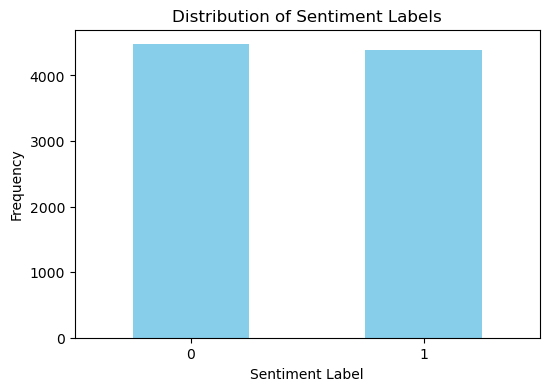

Training Dataset:



,id,text,sentiment_label
0,1cimjpr,"So instead of making savings, they continued t...",0
1,1d35qlg,Needless story to have dragged into the electi...,0
2,1d3i3mt,"Now, in an ideal world there would be insight ...",0
3,1d5a8wa,How did you not get mind controlled at birth t...,0
4,1d5l3e9,"Talk lately of conscription, having a store of...",0


In [79]:
# Optional, when already have necessary data files
# combined_sentiment_df = pd.read_csv("data_sentiment_preprocessed.csv")
# combined_sentiment_df_val = pd.read_csv("data_sentiment_preprocessed_val.csv")

# Display the combined DataFrame
print(f"Total rows in combined training dataset: {len(combined_sentiment_df)}\n")
print('\nClasses Distribution in Training Dataset:\n')
class_distribution(combined_sentiment_df)
print('\n')
plt.figure(figsize=(6,4))
combined_sentiment_df['sentiment_label'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment Label')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()
print("Training Dataset:\n")
combined_sentiment_df.head(5)

Total rows in combined validation dataset: 1212


Classes Distribution in Validation Dataset:

                 Count  Percentage
sentiment_label                   
0                 4473       50.45
1                 4393       49.55




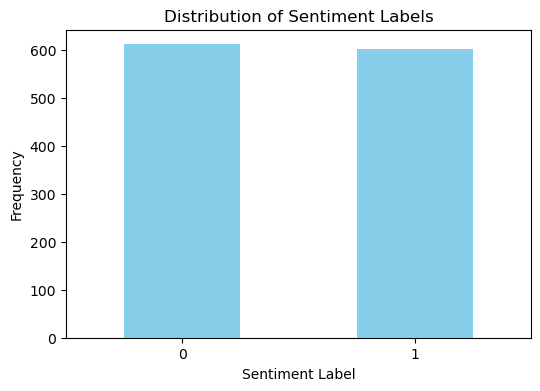

Validation Dataset:



,id,text,sentiment_label
0,1cpkok5,it was so pretty!,1
1,1c5a4oh,This man is a fuxking hero,1
2,1bj8f3p,I see the plan to destroy the NHS is still on ...,0
3,1d38fpx,"They are both truly awful, James Whale likes t...",0
4,1b2xlw6,I really wish the British Empire was better ta...,0


In [81]:
# Display the combined DataFrame
print(f"Total rows in combined validation dataset: {len(combined_sentiment_df_val)}\n")
print('\nClasses Distribution in Validation Dataset:\n')
class_distribution(combined_sentiment_df)
print('\n')
plt.figure(figsize=(6,4))
combined_sentiment_df_val['sentiment_label'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment Label')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()
print("Validation Dataset:\n")
combined_sentiment_df_val.head(5)

#### Number of characters per review:

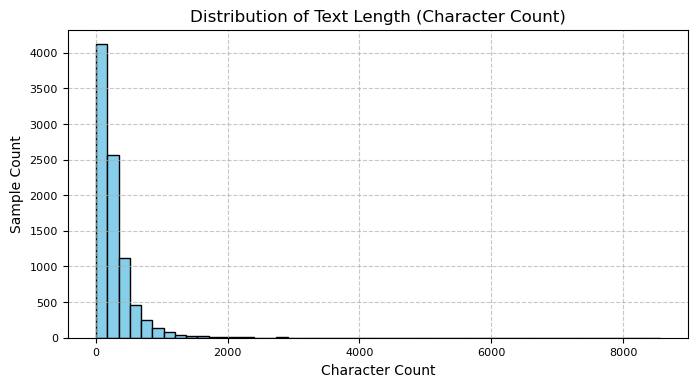

In [115]:
    plt.figure(figsize=(8, 4))
    combined_sentiment_df['text'].str.len().hist(bins=50, color='skyblue', edgecolor='black')
    plt.title('Distribution of Text Length (Character Count)', fontsize=12)
    plt.xlabel('Character Count', fontsize=10)
    plt.ylabel('Sample Count', fontsize=10)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

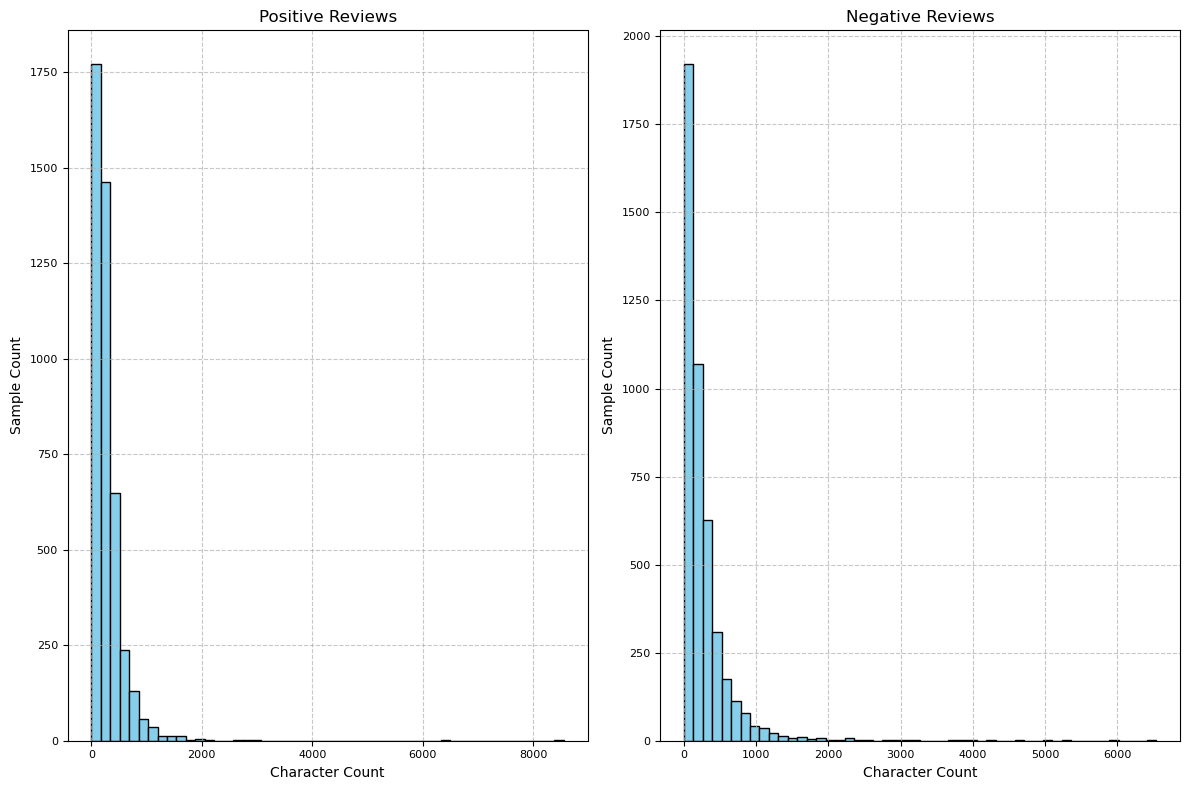

In [111]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

ax1.hist(combined_sentiment_df[combined_sentiment_df['sentiment_label'] == 1]['text'].str.len(), bins=50, color='skyblue', edgecolor='black')
ax1.set_title('Positive Reviews', fontsize=12)
ax1.set_xlabel('Character Count', fontsize=10)
ax1.set_ylabel('Sample Count', fontsize=10)
ax1.tick_params(axis='both', labelsize=8)
ax1.grid(True, linestyle='--', alpha=0.7)

ax2.hist(combined_sentiment_df[combined_sentiment_df['sentiment_label'] == 0]['text'].str.len(), bins=50, color='skyblue', edgecolor='black')
ax2.set_title('Negative Reviews', fontsize=12)
ax2.set_xlabel('Character Count', fontsize=10)
ax2.set_ylabel('Sample Count', fontsize=10)
ax2.tick_params(axis='both', labelsize=8)
ax2.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

#### Most common words:

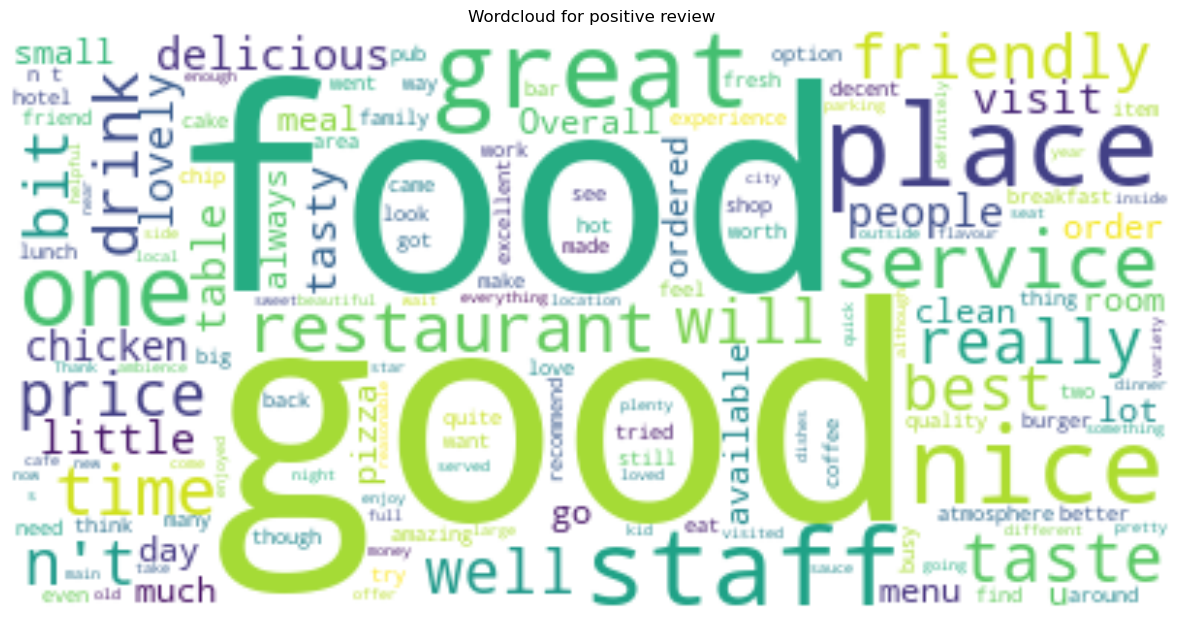

In [117]:
# POSITIVE SENTIMENT
text = " ".join(i for i in combined_sentiment_df[combined_sentiment_df['sentiment_label']==1]['text'])
wordcloud = WordCloud(background_color="white").generate(text)

plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Wordcloud for positive review')
plt.show()

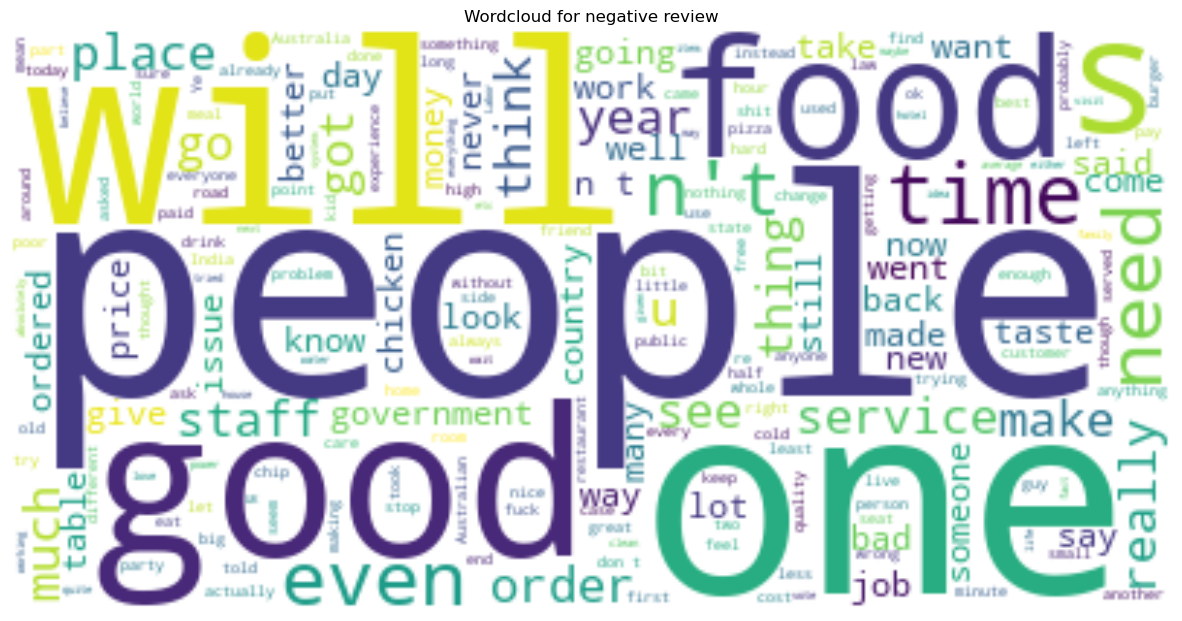

In [119]:
# NEGATIVE SENTIMENT
text = " ".join(i for i in combined_sentiment_df[combined_sentiment_df['sentiment_label']==0]['text'])
wordcloud = WordCloud( background_color="white").generate(text)

plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Wordcloud for negative review')
plt.show()

# 4. Text Preprocessing

### - Training Dataset

In [ ]:
# Preprocessing + Lemmatization 
combined_sentiment_df['clean_text'] = combined_sentiment_df['text'].apply(lambda x: text_preprocess(x, remove_digits=True, stemmer=Stemmer.WordNet))

In [ ]:
# Tokenization
combined_sentiment_df['tokenized_text'] = combined_sentiment_df['clean_text'].apply(lambda x: word_tokenize(x))
combined_sentiment_df.head(5)

In [27]:
# Save preprocessed training data
combined_sentiment_df.to_csv('data_sentiment_preprocessed.csv', index=False)

### - Validation Dataset

In [134]:
# Preprocessing + Lemmatization 
combined_sentiment_df_val['clean_text'] = combined_sentiment_df_val['text'].apply(lambda x: text_preprocess(x, remove_digits=True, stemmer=Stemmer.WordNet))
# Tokenization
combined_sentiment_df_val['tokenized_text'] = combined_sentiment_df_val['clean_text'].apply(lambda x: word_tokenize(x))
combined_sentiment_df_val.head(5)
# Save preprocessed validation data
combined_sentiment_df_val.to_csv('data_sentiment_preprocessed_val.csv', index=False)

# YOU CAN START FROM THIS POINT GUYS!!!!!!!!!!!!!!!

In [6]:
# Optional, when already have necessary data files
combined_sentiment_df = pd.read_csv('data_sentiment_preprocessed.csv')
combined_sentiment_df_val = pd.read_csv('data_sentiment_preprocessed_val.csv')

#### Missing Values:

In [8]:
print(combined_sentiment_df.isnull().value_counts())
combined_sentiment_df = combined_sentiment_df.dropna() # Drop rows where preprocessing didnt extract any tokens

id     text   sentiment_label  clean_text  tokenized_text
False  False  False            False       False             8860
                               True        False                6
Name: count, dtype: int64


In [10]:
print(combined_sentiment_df_val.isnull().value_counts())
combined_sentiment_df_val = combined_sentiment_df_val.dropna()

id     text   sentiment_label  clean_text  tokenized_text
False  False  False            False       False             1211
                               True        False                1
Name: count, dtype: int64


# 5. Features Extraction

In [12]:
from our_feature_extraction import basic_bag, tf_idf
# Split the data
X_train = combined_sentiment_df.tokenized_text
y_train = combined_sentiment_df.sentiment_label
X_val = combined_sentiment_df_val.tokenized_text
y_val = combined_sentiment_df_val.sentiment_label

## 5.1 Basic BoW
+ removing words that occurs less than 3 times

In [14]:
word_counts, vocab, selected_words, vectorizer, X_train_vec, X_val_vec = basic_bag(X_train, X_val, min_refs=2, debug=True)

Shape (X_train_vec):  (8860, 13942)
Shape (X_train_vec) after reduction:  (8860, 8068)
Shape (X_val_vec):  (1211, 8068)


In [16]:
# 10 most common words
word_counts = np.asarray(X_train_vec.sum(axis=0)).flatten()
vocab = np.array(vectorizer.get_feature_names_out())

top_indices = np.argsort(word_counts)[::-1]
top_words = vocab[top_indices[:10]]
top_counts = word_counts[top_indices[:10]]

print('Top 10 most common words:\n')
for word, count in zip(top_words, top_counts):
    print(f"{word}: {count}")

Top 10 most common words:

not: 4523
good: 3415
food: 2608
get: 1843
go: 1610
place: 1569
like: 1549
would: 1527
time: 1374
one: 1363


In [27]:
# Just test
unique = np.unique(X_train_vec[2].toarray())
print('Unique values:', unique)

Unique values: [0 1 2]


## 5.2 1-hot BoW
+ removing words that occurs less than 3 times

In [21]:
word_counts, vocab, selected_words, vectorizer, X_train_hot, X_val_hot = basic_bag(X_train, X_val, min_refs=2, ohe=True, debug=True)

Shape (X_train_vec):  (8860, 13942)
Shape (X_train_vec) after reduction:  (8860, 8068)
Shape (X_val_vec):  (1211, 8068)


In [23]:
# Checking if dataset is binary
unique = np.unique(X_train_hot.toarray())
print('Unique values:', unique)

Unique values: [0 1]


## 5.3 TF-IDF

In [33]:
word_counts, vocab, selected_words, vectorizer, X_train_vec_tf, X_val_vec_tf = tf_idf(X_train, X_val, min_refs=3, debug=True)

Shape (X_train_vec):  (8860, 13942)
Shape (X_train_vec) after reduction:  (8860, 6231)
Shape (X_val_vec):  (1211, 6231)


## 5.4 N-grams

### 5.4.1 Bigrams

In [22]:
word_counts, vocab, selected_words, vectorizer, X_train_vec_bi, X_val_vec_bi = basic_bag(X_train, X_val, ngram_range=(2,2), min_refs=2, debug=True)

Shape (X_train_vec):  (8860, 161809)
Shape (X_train_vec) after reduction:  (8860, 22912)
Shape (X_val_vec):  (1211, 22912)


In [26]:
bigram_vocab = vectorizer.get_feature_names_out()
bigram_counts = np.asarray(X_train_vec_bi.sum(axis=0)).flatten()

bigram_freq = list(zip(bigram_vocab, bigram_counts))

# Soritng
sorted_bigram_freq = sorted(bigram_freq, key=lambda x: x[1], reverse=True)

print("10 most common bigrams:\n")
for bigram, count in sorted_bigram_freq[:10]:
    print(f"{bigram}: {count}")

10 most common bigrams:

food good: 194
staff friendly: 160
not good: 145
really good: 128
good place: 126
good food: 124
look like: 122
taste good: 118
not even: 110
service good: 109


## 5.5 Words Embedding (Word2Vec)

In [ ]:
# code

# 6. Modeling

## 6.1 Naive Bayes Model

### - Basic BoW

In [ ]:
nb(X_train_vec, X_val_vec, y_train, y_val)

### - 1-hot BoW

In [ ]:
nb(X_train_hot, X_val_hot, y_train, y_val)

### - TF-IDF

In [ ]:
nb(X_train_vec_tf, X_val_vec_tf, y_train, y_val)

### - Bigrams

In [ ]:
nb(X_train_vec_bi, X_val_vec_bi, y_train, y_val)

## 6.2 Support Vector Machine (SVM)

### - Basic BoW

In [ ]:
support_vector_machine(X_train_vec, X_val_vec, y_train, y_val)

### - 1-hot BoW

In [ ]:
support_vector_machine(X_train_hot, X_val_hot, y_train, y_val)

### - TF-IDF

In [ ]:
support_vector_machine(X_train_vec_tf, X_val_vec_tf, y_train, y_val)

### - Bigrams

In [ ]:
support_vector_machine(X_train_vec_bi, X_val_vec_bi, y_train, y_val)

## 6.3 Random Forest

### - Basic BoW

In [ ]:
random_forest(X_train_vec, X_val_vec, y_train, y_val)

### - 1-hot BoW

In [ ]:
random_forest(X_train_hot, X_val_hot, y_train, y_val)

### - TF-IDF

In [ ]:
random_forest(X_train_vec_tf, X_val_vec_tf, y_train, y_val)

### - Bigrams

In [ ]:
random_forest(X_train_vec_bi, X_val_vec_bi, y_train, y_val)